In [100]:
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [6]:
df = pd.read_csv("Reviews.csv")
df = df[:10000]

In [73]:
import warnings
warnings.filterwarnings("ignore")

# Part 1

## 第一題

In [3]:
df.drop(['Id','ProductId','HelpfulnessNumerator',
         'HelpfulnessDenominator','Time','Summary','Text'],axis = 1, inplace=True)
by_id = df.groupby(["UserId","ProfileName"])
count_df = by_id.count() 
mean_df = by_id.mean()
count_df.rename(columns={'Score':'Score count'},inplace=True)
mean_df.rename(columns={'Score':'Score mean'},inplace=True)
combine = pd.concat([count_df,mean_df],axis=1)
combine.sort_values(by='Score count',inplace=True,ascending=False)
combine.head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


## 第二題

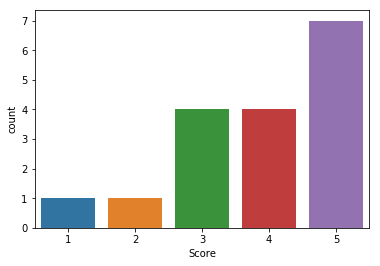

In [13]:
small = df[df['UserId']=='A1Z54EM24Y40LL']
sns.countplot(x="Score", data=small)

## 第三題

Text(0.5, 0, 'Review year')

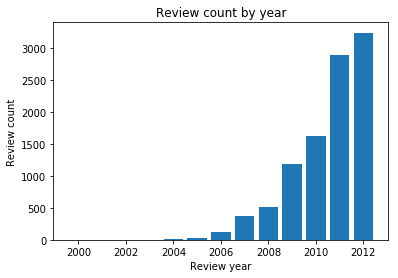

In [78]:
from datetime import datetime

def toDate(time):
    dt = datetime.fromtimestamp(time)
    return dt.strftime('%Y-%m-%d')
def saveYear(date):
    return date.split('-')[0]
series_date = df['Time'].apply(toDate)
series_sortDate = series_date.sort_values()
series_Year = series_sortDate.apply(saveYear)
series_yearCount = series_Year.value_counts()
series_yearCount = series_yearCount.sort_values()
x = [dt.datetime.strptime(d,'%Y').date() for d in series_yearCount.index]
y = series_yearCount.values
fig, ax = plt.subplots()
ax.bar(x,y,width=300)
ax.set_title('Review count by year')
ax.set_ylabel('Review count')
ax.set_xlabel('Review year')

Text(0.5, 0, 'Date')

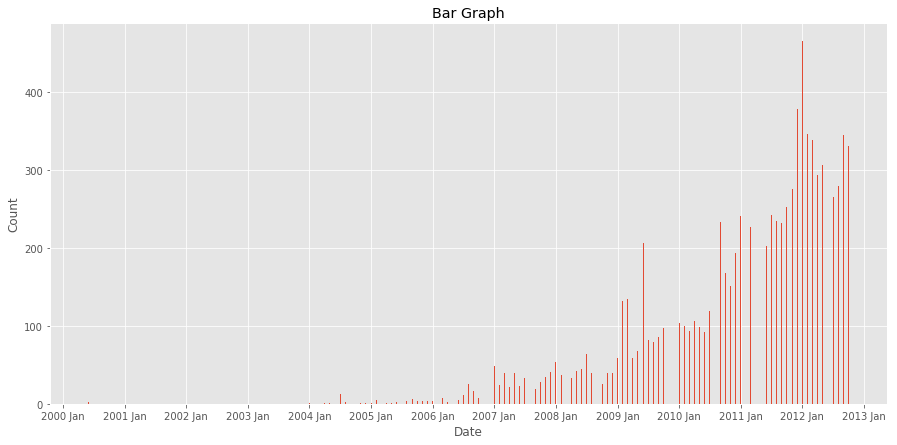

In [132]:
#set ggplot styleB
plt.style.use('ggplot')

#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(x,y,width=5)

#set ticks every month
ax.xaxis.set_major_locator(mdates.YearLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))  #mdates.DateFormatter use `strftime` format string

ax.set_title('Bar Graph')
ax.set_ylabel('Count')
ax.set_xlabel('Date')

## 第四題

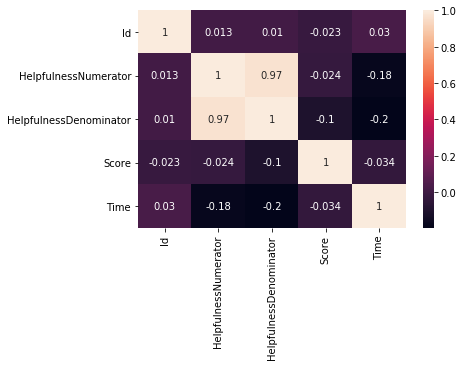

In [14]:
df_all = pd.read_csv("Reviews.csv")
df_all = df_all[:10000]
sns.heatmap(data=df_all.corr(),annot=True)

## 第五題

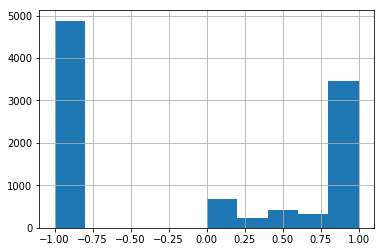

In [7]:
def percent(Numerator,Denominator):
    if Numerator > Denominator:
        return -1
    elif Denominator == 0:
        return -1
    else:
        return Numerator / Denominator
# df['HelpfulnessNumerator'] = df[['HelpfulnessNumerator','HelpfulnessDenominator']].apply(percent)
df['new_column'] = np.vectorize(percent)(df['HelpfulnessNumerator'], df['HelpfulnessDenominator'])
# np.vectorize(fx)(df['A'], df['B'])
df['new_column'].hist()

# Part 2
## 這是 NBA 球員的資料
- [資料來源](https://www.kaggle.com/drgilermo/nba-players-stats)
- 用 df_player 來存所有球員的資料

In [3]:
df_player = pd.read_csv('player_data.csv')

In [58]:
df_player.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


## 先看看哪些 columns 包含 null values

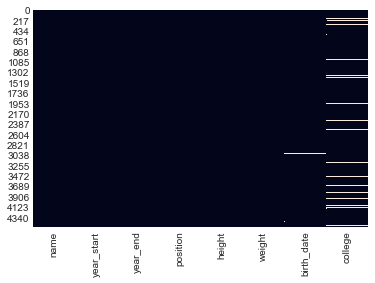

In [142]:
sns.heatmap(df_player.isnull(),cbar=False)

## 分析哪些學校是籃球名校
- 用 series_college 來存所有球員所唸的大學
- 篩選條件：至少出產40個球員
- 最多球員來自 Kentucky，依序是 UCLA, North Carlina ( Jordan 的母校), Kansas, Duke 等等

In [8]:
series_college = df_player['college']

In [15]:
college_count = series_college.value_counts()

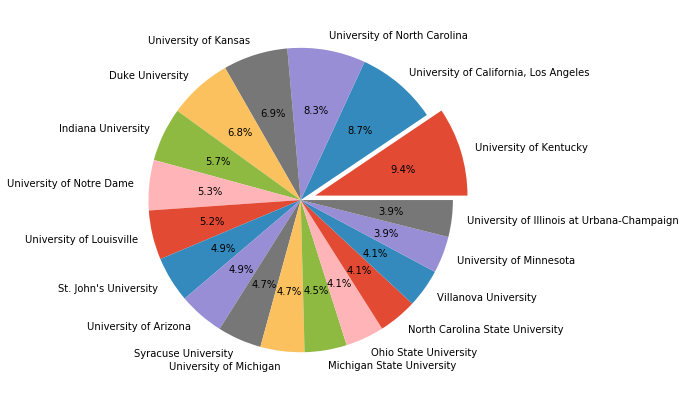

In [54]:
explode = []
plt.style.use('ggplot')
size = college_count[college_count.values > 40]
for row in size.index:
    explode.append(0)
explode[0] = 0.1
fig1, ax1 = plt.subplots(figsize=(15,7))

ax1.pie(x=size.values, labels=size.index, autopct='%1.1f%%', explode=explode)
print()

## 身高體重隨時間變化
- 先刪掉包含 null value 的 row 
- 可以看出球員的營養越來越好了呢

Text(0.5, 0, 'Year')

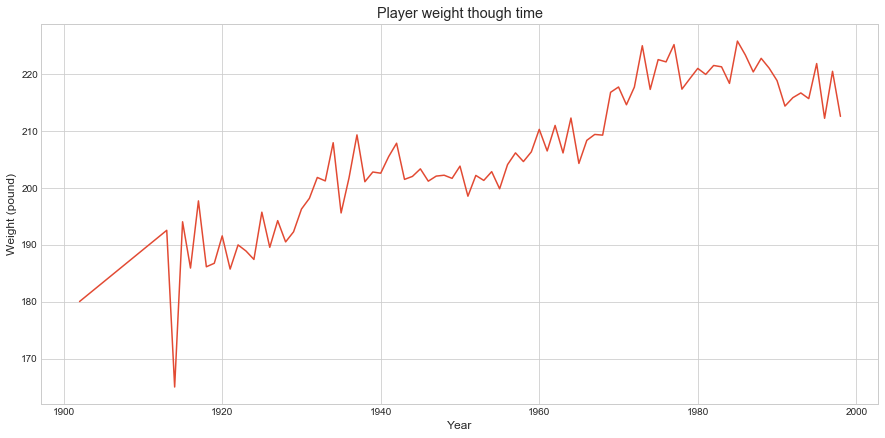

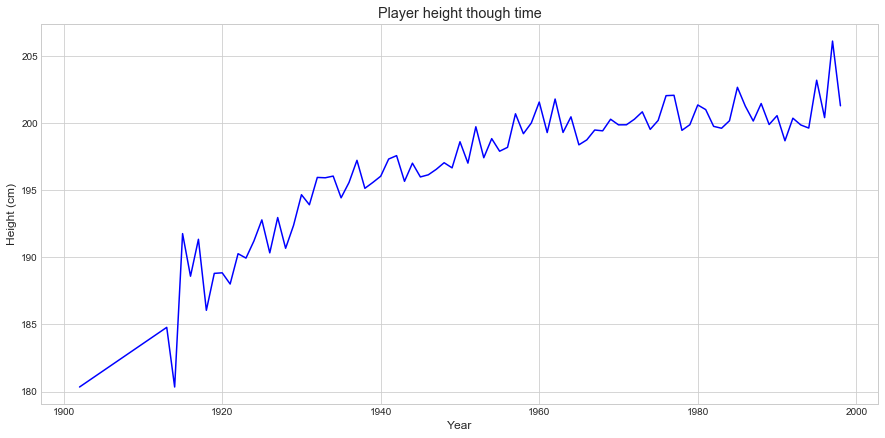

In [130]:
df_player_BirthNotNull = df_player[pd.notnull(df_player['birth_date'])]
def birth_date_to_year(birthDate):
    return birthDate.split(',')[1]
df_player_BirthNotNull['birth_date'] = df_player_BirthNotNull['birth_date'].apply(birth_date_to_year)
df_player_BirthNotNull.head()
df_Weight = df_player_BirthNotNull[['weight','birth_date']]
avgWeightPerYear = df_Weight.groupby('birth_date')['weight'].mean()
plt.style.use('seaborn-whitegrid')
x = [datetime.strptime(d,' %Y').date() for d in avgWeightPerYear.index]
y = avgWeightPerYear.values
fig2, ax2 = plt.subplots(figsize=(15,7))
ax2.plot(x,y)
ax2.set_title('Player weight though time')
ax2.set_ylabel('Weight (pound)')
ax2.set_xlabel('Year')
def HeightToCM(height):
    height = str(height)
    feet = int(height.split('-')[0])
    inch = int(height.split('-')[1])
    return (12 * feet + inch) * 2.54
df_Height = df_player_BirthNotNull[['height','birth_date']]
df_Height = df_Height[pd.notnull(df_Height['height'])]
df_Height['height'] = df_Height['height'].apply(HeightToCM)
avgHeightPerYear = df_Height.groupby('birth_date')['height'].mean()
x_height = [datetime.strptime(d,' %Y').date() for d in avgHeightPerYear.index]
y_height = avgHeightPerYear.values
fig3, ax3 = plt.subplots(figsize=(15,7))
ax3.plot(x_height,y_height,'b')
ax3.set_title('Player height though time')
ax3.set_ylabel('Height (cm)')
ax3.set_xlabel('Year')

## 查看各個位子的球員分佈比例

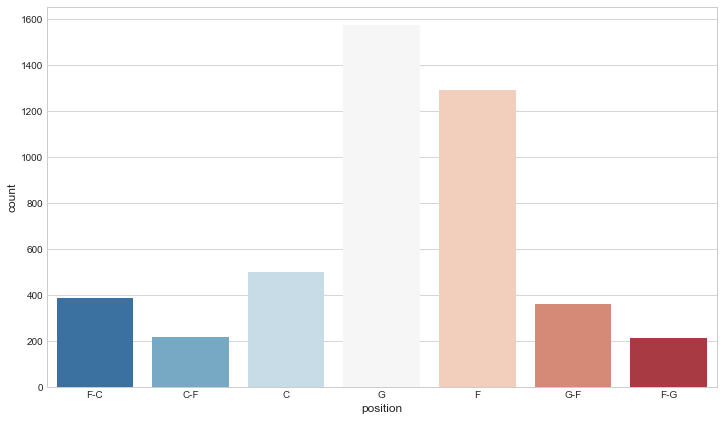

In [153]:
plt.figure(figsize=(12, 7))
#sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
sns.countplot(x='position',data=df_player,palette='RdBu_r')

## 查看不同位子的球員體重跟身高分佈

Text(0.5, 1.0, 'Weight on different position')

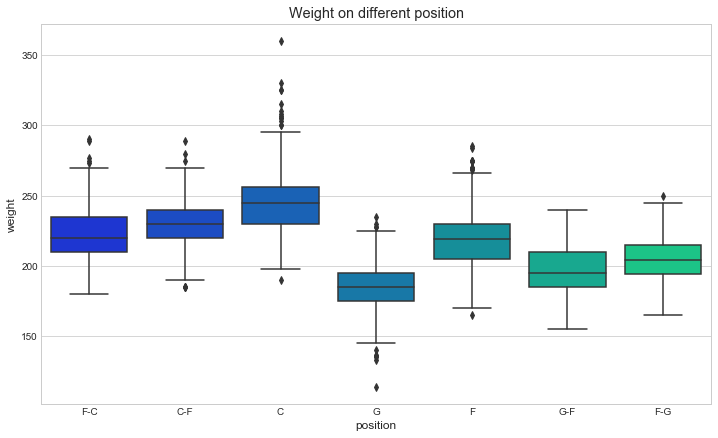

In [163]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='position',y='weight',data=df_player,palette='winter').set_title('Weight on different position')

Text(0.5, 1.0, 'Height on different posision')

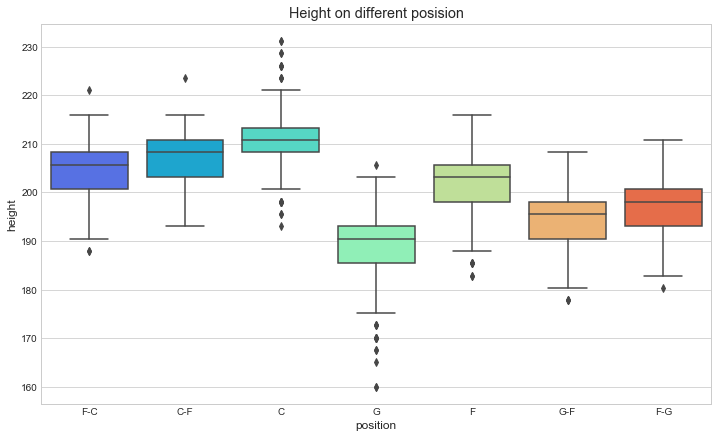

In [164]:
df_player_heightNotNull = df_player[pd.notnull(df_player['height'])]
df_player_heightNotNull['height'] = df_player_heightNotNull['height'].apply(HeightToCM)
plt.figure(figsize=(12, 7))
sns.boxplot(x='position',y='height',data=df_player_heightNotNull,palette='rainbow').set_title('Height on different posision')